# DATA CLEANING BATON ROUGE CRIME INCIDENTS 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Legacy_Baton_Rouge_Crime_Incidents.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. FIRST UNDERSTANDING THE DATA 

In [3]:
print("TOTAL NUMBER OF COLUMNS ARE", len(df.columns))
print("NAME OF COLUMNS ARE AS FOLLOWS",  df.columns)

TOTAL NUMBER OF COLUMNS ARE 22
NAME OF COLUMNS ARE AS FOLLOWS Index(['FILE NUMBER', 'OFFENSE DATE', 'OFFENSE TIME', 'CRIME', 'COMMITTED',
       'OFFENSE', 'OFFENSE DESCRIPTION', 'FULL ADDRESS', 'ADDRESS NUMBER',
       'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'CITY', 'STATE',
       'ZIP CODE', 'DISTRICT', 'ZONE', 'SUBZONE', 'COMPLETE DISTRICT',
       'COUNCIL DISTRICT', 'CRIME PREVENTION DISTRICT', 'GEOLOCATION'],
      dtype='object')


In [4]:
print("NUMBER OF ROWS AND COLUMNS ARE", df.shape)

NUMBER OF ROWS AND COLUMNS ARE (490578, 22)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490578 entries, 0 to 490577
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FILE NUMBER                483265 non-null  float64
 1   OFFENSE DATE               490578 non-null  object 
 2   OFFENSE TIME               490578 non-null  object 
 3   CRIME                      490578 non-null  object 
 4   COMMITTED                  490578 non-null  object 
 5   OFFENSE                    490578 non-null  object 
 6   OFFENSE DESCRIPTION        490578 non-null  object 
 7   FULL ADDRESS               483265 non-null  object 
 8   ADDRESS NUMBER             482448 non-null  float64
 9   STREET DIRECTION           80244 non-null   object 
 10  STREET NAME                483265 non-null  object 
 11  STREET TYPE                466665 non-null  object 
 12  CITY                       483265 non-null  object 
 13  STATE                      48

In [6]:
df.describe()

,FILE NUMBER,ADDRESS NUMBER,ZIP CODE,COUNCIL DISTRICT
count,4.832650e+05,482448.000000,487531.000000,487263.000000
mean,1.516993e+09,4351.193814,70811.595012,7.749476
std,2.892894e+08,3459.700401,1845.609933,2.834581
min,1.000000e+09,1.000000,1.000000,1.000000
25%,1.300007e+09,1689.000000,70805.000000,6.000000
50%,1.500072e+09,3484.000000,70806.000000,7.000000
75%,1.800015e+09,5963.000000,70811.000000,10.000000
max,5.500004e+09,99999.000000,708078.000000,12.000000


In [7]:
# Finding percentage of null values in every column.
df.isnull().sum()* 100 /len(df)

FILE NUMBER                   1.490691
OFFENSE DATE                  0.000000
OFFENSE TIME                  0.000000
CRIME                         0.000000
COMMITTED                     0.000000
OFFENSE                       0.000000
OFFENSE DESCRIPTION           0.000000
FULL ADDRESS                  1.490691
ADDRESS NUMBER                1.657229
STREET DIRECTION             83.642968
STREET NAME                   1.490691
STREET TYPE                   4.874454
CITY                          1.490691
STATE                         1.490691
ZIP CODE                      0.621104
DISTRICT                      4.713216
ZONE                          4.713216
SUBZONE                       4.713216
COMPLETE DISTRICT             4.713216
COUNCIL DISTRICT              0.675734
CRIME PREVENTION DISTRICT     0.673695
GEOLOCATION                   1.490691
dtype: float64

## 2. DROPPING COLUMNS FILE NUMBER AND STREET DIRECTION 
## & COLUMNS CONTAINING NULL VALUES

In [8]:
#Droping Columns 
df.drop(labels= {"FILE NUMBER",  "STREET DIRECTION"}, axis =1 , inplace = True)

In [18]:
pd.get_option("display.max_columns", None)

20

In [58]:
## Getting Column names having null more than zero. 
df.isnull().sum()[df.isnull().sum() > 0].index

Index(['OFFENSE TIME', 'FULL ADDRESS', 'ADDRESS NUMBER', 'STREET NAME',
       'STREET TYPE', 'CITY', 'STATE', 'ZIP CODE', 'DISTRICT', 'ZONE',
       'SUBZONE', 'COMPLETE DISTRICT', 'COUNCIL DISTRICT',
       'CRIME PREVENTION DISTRICT', 'GEOLOCATION', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [59]:
Columns_with_null = ['FULL ADDRESS', 'ADDRESS NUMBER', 'OFFENSE TIME', 'STREET NAME', 'STREET TYPE', 'CITY',
       'STATE', 'ZIP CODE', 'DISTRICT', 'ZONE', 'SUBZONE', 'COMPLETE DISTRICT',
       'COUNCIL DISTRICT', 'CRIME PREVENTION DISTRICT', 'GEOLOCATION',
       'LONGITUDE', 'LATITUDE']

In [64]:
# Deleting all null rows from the columns.
df.dropna(axis = 0 , inplace = True, subset = Columns_with_null)

### Number of Null in every column.

In [65]:
df.isnull().sum()

OFFENSE DATE                 0
OFFENSE TIME                 0
CRIME                        0
COMMITTED                    0
OFFENSE                      0
OFFENSE DESCRIPTION          0
FULL ADDRESS                 0
ADDRESS NUMBER               0
STREET NAME                  0
STREET TYPE                  0
CITY                         0
STATE                        0
ZIP CODE                     0
DISTRICT                     0
ZONE                         0
SUBZONE                      0
COMPLETE DISTRICT            0
COUNCIL DISTRICT             0
CRIME PREVENTION DISTRICT    0
GEOLOCATION                  0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

## 3. CHANGING COLUMN DATA TYPES 

In [14]:
df["OFFENSE DATE"] = pd.to_datetime(df["OFFENSE DATE"]) ## OFFENSE DATE

In [15]:
# Sorting data frame on dates

df.sort_values(by = "OFFENSE DATE", inplace = True)

In [16]:
# Re-indexing the dataframe
df.reset_index(drop =True, inplace = True)

In [34]:
# Converting object to int type data and deleting the object-int mix data. 
df["OFFENSE TIME"] = pd.to_numeric(df["OFFENSE TIME"], errors ="coerce") # OFFENSE TIME

## 4.FINDING & REMOVING OUTLIERS FROM ZIP CODE COLUMN

In [17]:
df.describe()

,ADDRESS NUMBER,ZIP CODE,COUNCIL DISTRICT
count,482448.000000,487531.000000,487263.000000
mean,4351.193814,70811.595012,7.749476
std,3459.700401,1845.609933,2.834581
min,1.000000,1.000000,1.000000
25%,1689.000000,70805.000000,6.000000
50%,3484.000000,70806.000000,7.000000
75%,5963.000000,70811.000000,10.000000
max,99999.000000,708078.000000,12.000000


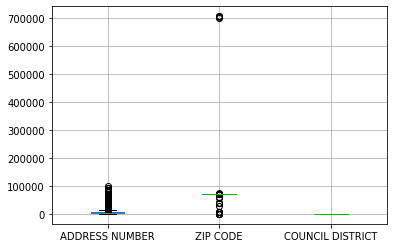

In [22]:
# checking statistical outliers
df.boxplot();

In [23]:
df[df["ZIP CODE"] > 70898].index # 7 rows above 70898 found

Int64Index([54795, 69562, 160031, 228289, 229805, 260476, 321190], dtype='int64')

In [24]:
Zip_code_above_range = df[df["ZIP CODE"] > 70898].index

In [25]:
df.drop(axis = 0, inplace = True, index = Zip_code_above_range)

In [26]:
df.reset_index(drop = True, inplace = True)

In [27]:
df[df["ZIP CODE"] < 70801].index # 56 rows below 70801 found 

Int64Index([ 13233,  14129,  18561,  21954,  34045,  37229,  52546,  54547,
             55864, 114882, 120498, 140342, 140933, 141338, 143413, 143465,
            157648, 168514, 185521, 188862, 210072, 214499, 227312, 243886,
            256223, 281659, 281678, 281697, 285710, 288525, 290013, 296633,
            308859, 315201, 328119, 335183, 351839, 352797, 353324, 363372,
            367999, 370982, 378309, 379627, 395911, 396229, 399566, 428310,
            429797, 434981, 437445, 441838, 450994, 453341, 469706, 489630],
           dtype='int64')

In [28]:
Zip_code_below_range = df[df["ZIP CODE"] < 70801].index

In [29]:
df.drop(axis = 0, inplace = True, index = Zip_code_below_range)

In [30]:
df.reset_index(drop = True, inplace = True)

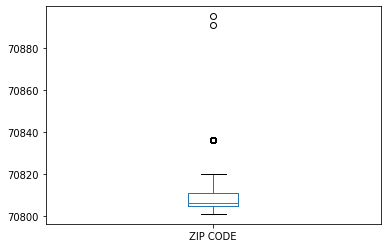

In [31]:
df["ZIP CODE"].plot(kind = "box");

In [32]:
df.describe()

,ADDRESS NUMBER,ZIP CODE,COUNCIL DISTRICT
count,482389.000000,487468.000000,487247.000000
mean,4350.543551,70808.020180,7.749605
std,3456.134618,5.234276,2.834498
min,1.000000,70801.000000,1.000000
25%,1689.000000,70805.000000,6.000000
50%,3484.000000,70806.000000,7.000000
75%,5962.000000,70811.000000,10.000000
max,99999.000000,70895.000000,12.000000


### 5. FINDING AND REMOVING DUPLICATE ROWS 

In [40]:
df[df.duplicated(subset=None, keep = "first")].head(10)

,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,STREET TYPE,CITY,STATE,ZIP CODE,DISTRICT,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION
459,2011-01-03,1900.0,CRIMINAL DAMAGE TO PROPERTY,COMMITTED,13:56,CRIM DAM TO PROP/SIMPLE/CC,1150 TERRACE ST,1150.0,TERRACE,ST,BATON ROUGE,LA,70802.0,2,D,1,2D1,10.0,NONE,"1150 TERRACE ST\nBATON ROUGE, LA 70802\n(30.43..."
1625,2011-01-10,1800.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRUF,BURG/S NON RES UNK FORCE,4756 NORTH BL,4756.0,NORTH,BL,BATON ROUGE,LA,70806.0,2,B,1,2B1,7.0,NONE,"4756 NORTH BL\nBATON ROUGE, LA 70808\n(30.4538..."
1777,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1790,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1797,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1829,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1838,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1843,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70815"
1845,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"
1864,2011-01-12,2000.0,NON-RESIDENTIAL BURGLARY,COMMITTED,14:62/NRNF,BURG/S NON RES NIGHT FORCE,7375 AIRLINE HW,7375.0,AIRLINE,HW,BATON ROUGE,LA,70814.0,3,A,1,3A1,5.0,NONE,"7375 AIRLINE HW\nBATON ROUGE, LA 70814"


In [41]:
df.drop_duplicates(keep = "first", inplace = True)

In [80]:
df.duplicated().sum()
#  df.reset_index(inplace = True)
# df.drop(axis = 1,columns= {"level_0", "index"}, inplace = True )

0

## 6. EXTRACTING INFORMATION FROM A COLUMN AND CREATING NEW COLUMNS 

In [38]:
df["GEOLOCATION"][0] 

'944 MONET DR\nBATON ROUGE, LA\n(30.458381, -91.11738)'

In [31]:
  df["GEOLOCATION"].str.split("\n", n =2, expand = True).iloc[:,2].str.replace(r'[()]',"").str.split(",", n = 2, expand = True)
 #df["GEOLOCATION"].str.split("\n", n= 3, expand = True).iloc[:, 0].str.split(" ", n=2 , expand = True).iloc[:,0]
 #df["GEOLOCATION"].str.split("\n", n= 3, expand = True).iloc[:, 0].str.split(" ", n=2 , expand = True).iloc[:,1]
 #df["GEOLOCATION"].str.split("\n", n= 3, expand = True).iloc[:, 0].str.split(" ", n=2 , expand = True).iloc[:,2]

,0,1
0,30.52347,-91.181124
1,30.504718,-91.151324
2,30.500722,-91.130123
3,30.45325,-91.102543
4,30.499248,-91.153222
...,...,...
490573,30.45469,-91.076897
490574,30.445782,-91.090872
490575,30.445782,-91.090872
490576,30.504255,-91.151478


In [55]:
df["LATITUDE"] = df["GEOLOCATION"].str.split("\n", n= 2, expand = True ).iloc[:, 2].str.replace(r'[()]',"").str.split(",", n=2, expand = True)[0]

In [56]:
df["LONGITUDE"] = df["GEOLOCATION"].str.split("\n", n =2, expand = True).iloc[:,2].str.replace(r'[()]',"").str.split(",", n = 2, expand = True)[1]

In [81]:
df

,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,STREET TYPE,...,ZIP CODE,DISTRICT,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,LATITUDE,LONGITUDE
0,2011-01-01,1200.0,THEFT,COMMITTED,14:67.21,THEFT OF ASSETS FROM AGED / DISABLED PERSON,944 MONET DR,944.0,MONET,Drive,...,70806.0,1,D,1,1D1,6.0,MELROSE EAST,"944 MONET DR\nBATON ROUGE, LA\n(30.458381, -91...",30.458381,-91.11738
1,2011-01-01,2309.0,NUISANCE,COMMITTED,13:1001,LITTERING (CC),300 DELPHINE ST,300.0,DELPHINE,Street,...,70806.0,2,A,3,2A3,10.0,NONE,"300 DELPHINE ST\nBATON ROUGE, LA\n(30.445911, ...",30.445911,-91.164083
2,2011-01-01,1915.0,OTHER,COMMITTED,13:1018,DRINKING IN PUBLIC/CC,1760 PLANK RD,1760.0,PLANK,Road,...,70802.0,1,B,1,1B1,7.0,NONE,"1760 PLANK RD\nBATON ROUGE, LA 70805\n(30.4641...",30.464164,-91.165582
3,2011-01-01,1131.0,THEFT,COMMITTED,14:67.16,THEFT/IDENTITY,4445 PLANK RD,4445.0,PLANK,Road,...,70805.0,1,E,1,1E1,10.0,NONE,"4445 PLANK RD\nBATON ROUGE, LA 70805\n(30.4904...",30.490433,-91.156332
4,2011-01-01,2345.0,NARCOTICS,COMMITTED,13:966,POSS MARIJUANA/CC,8194 PLANK RD,8194.0,PLANK,Road,...,70811.0,4,D,1,4D1,2.0,NONE,"8194 PLANK RD\nBATON ROUGE, LA 70807\n(30.5240...",30.524001,-91.14442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488538,2021-01-02,130.0,OTHER,COMMITTED,14:62.2,BURGLARY/S INHAB DWELLING,155 MARILYN DR,155.0,MARILYN,Drive,...,70815.0,3,C,1,3C1,6.0,NONE,"155 MARILYN DR\nBATON ROUGE, LA 70815\n(30.454...",30.45469,-91.076897
488539,2021-01-05,1049.0,THEFT,COMMITTED,14:67/AI,THEFT OVER $200 ALL OTHER,9000 AIRLINE HW,9000.0,AIRLINE,Highway,...,70815.0,3,A,1,3A1,11.0,NONE,"9000 AIRLINE HW\nBATON ROUGE, LA\n(30.445782, ...",30.445782,-91.090872
488540,2021-01-05,1049.0,THEFT,COMMITTED,14:70.4,ACCESS DEVICE FRAUD,9000 AIRLINE HW,9000.0,AIRLINE,Highway,...,70815.0,3,A,1,3A1,11.0,NONE,"9000 AIRLINE HW\nBATON ROUGE, LA\n(30.445782, ...",30.445782,-91.090872
488541,2021-01-06,716.0,THEFT,COMMITTED,14:72.2,MONETARY INSTRUMENT ABUSE,5950 PLANK RD,5950.0,PLANK,Road,...,70805.0,4,D,1,4D1,5.0,NONE,"5950 PLANK RD\nBATON ROUGE, LA\n(30.504255, -9...",30.504255,-91.151478


## 7. REPLACING VALUES IN A COLUMN

In [69]:
df["STREET TYPE"].sample(10)

208820    ST
14873     ST
61588     RD
46515     RD
212756    PL
417462    DR
64748     ST
270602    ST
177293    ST
373463    DR
Name: STREET TYPE, dtype: object

In [70]:
import numpy as np

In [71]:
# Street type found on internet, using it to replace values.
Replacing_values = {'DR': "Drive" , 'ST' : "Street", 'RD' : "Road", 'BL' : "Boulevard", 'AV' : "Avenue", 'PL' : "Place", 'TH' : "Throughway", np.nan : None , 'HW': "Highway" , 'LN' : "Lane", 'CT' : "Centre",
       'PK' : "Park", 'CR' : "Circle" , 'OT' : "Orchard ", 'BT' : "Bottom", 'WY' : "Way"}

In [72]:
np.nan

nan

In [73]:
df["STREET TYPE"] = df["STREET TYPE"].map(Replacing_values)

In [74]:
df["STREET TYPE"].sample(10)

62976        Street
376152        Drive
400467       Street
450449      Highway
307645    Boulevard
103154       Street
288291        Drive
223556      Highway
57662        Avenue
33311        Street
Name: STREET TYPE, dtype: object

In [9]:
print(round((490578-416079)*100/490578,2), "% of unwanted data removed from the dataset.")

15.19 % of unwanted data removed from the dataset.
